
# Data Exploration

In [1]:
import pandas as pd

# Load the training dataset
df = pd.read_csv('/Users/ronitgandhi/Downloads/spaceship-titanic/train.csv')

# Display the first few rows
print("First five rows:")
print(df.head())

# Print basic information about data types and non-null counts
print("\nData Info:")
print(df.info())

# Get summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values per column
print("\nMissing Values per Column:")
print(df.isnull().sum())


First five rows:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4 

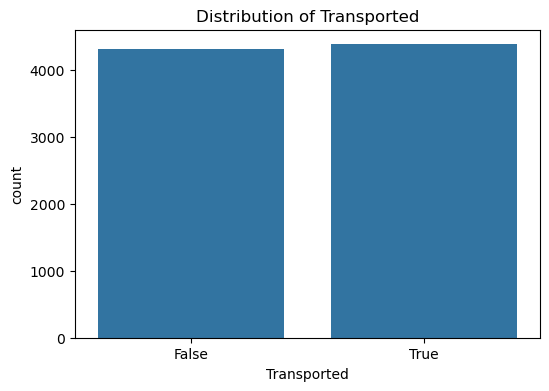

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Transported', data=df)
plt.title("Distribution of Transported")
plt.show()


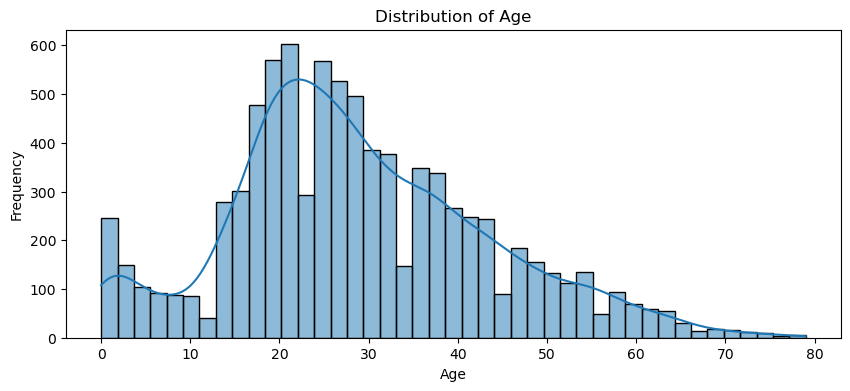

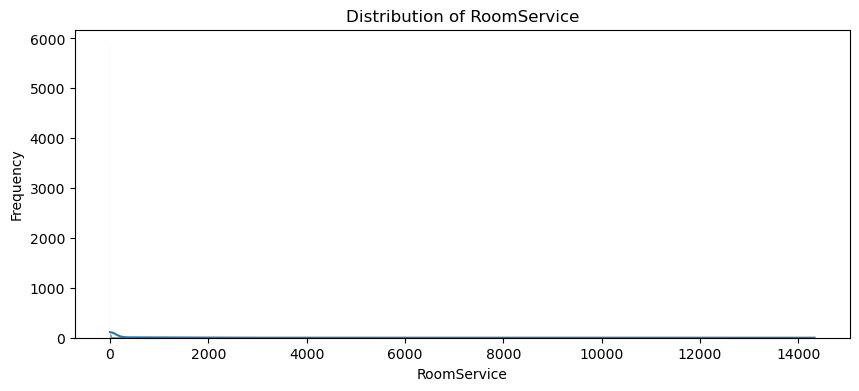

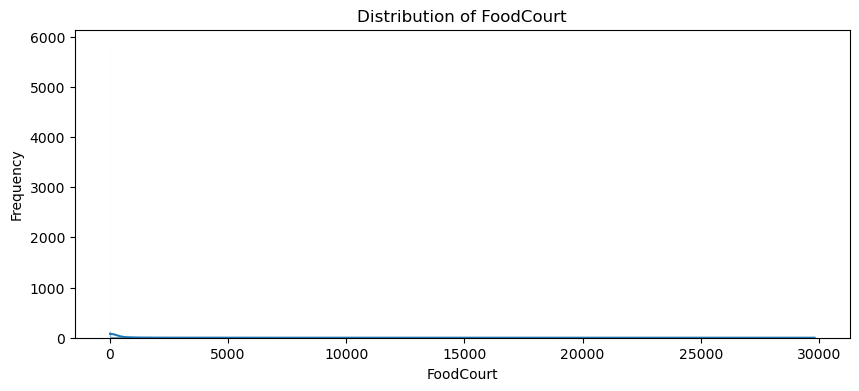

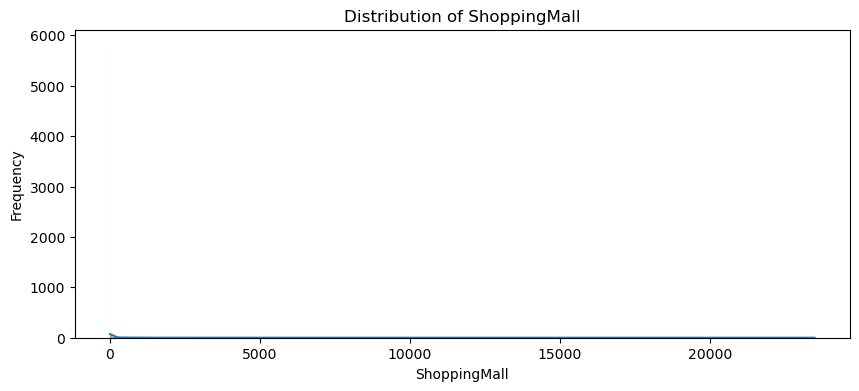

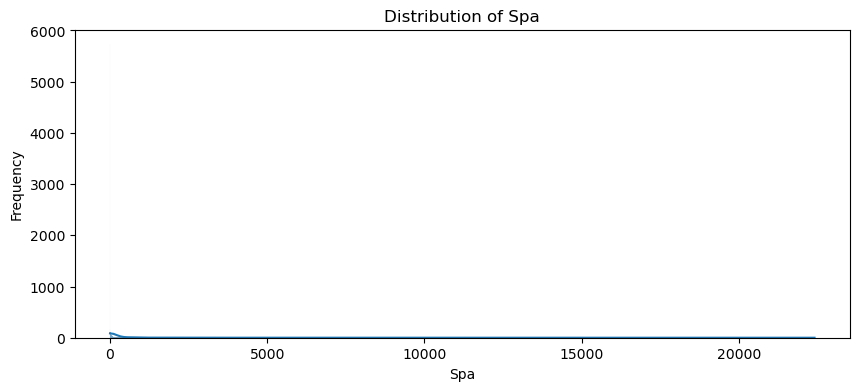

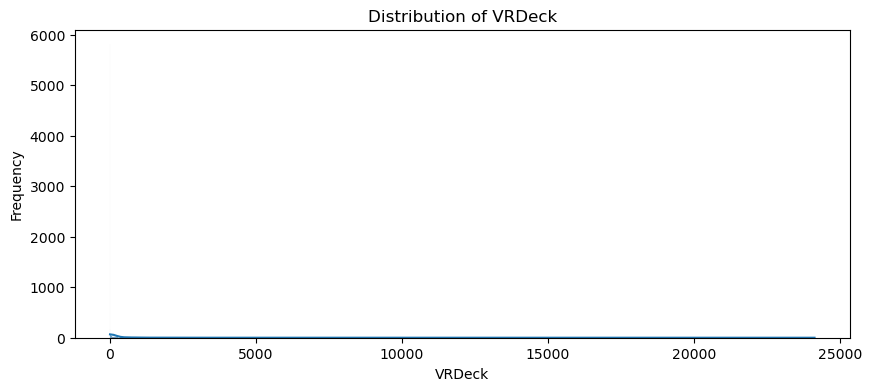

In [3]:
# List of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


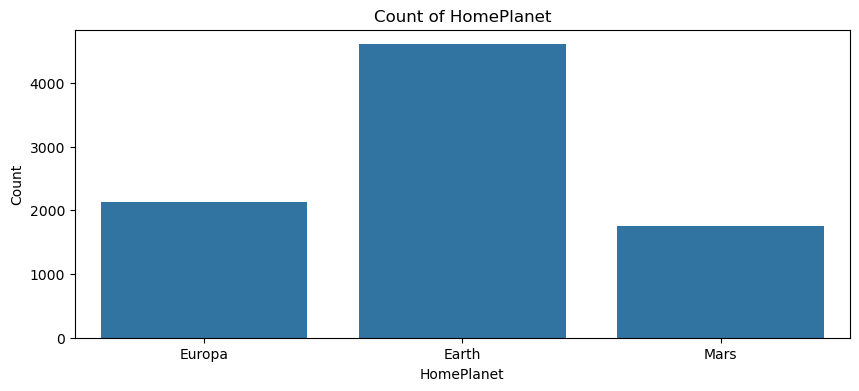

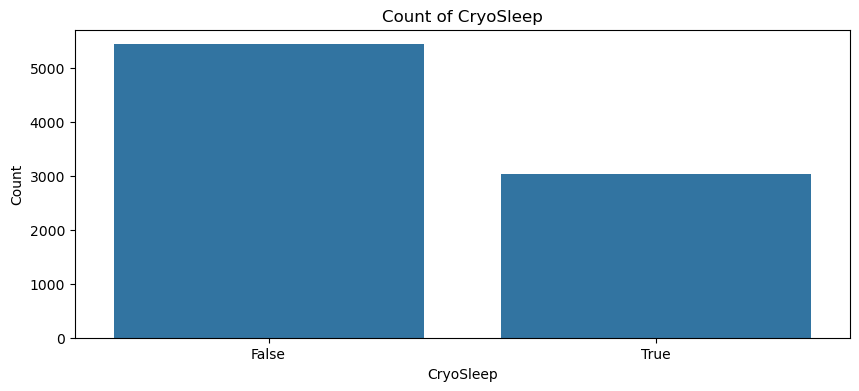

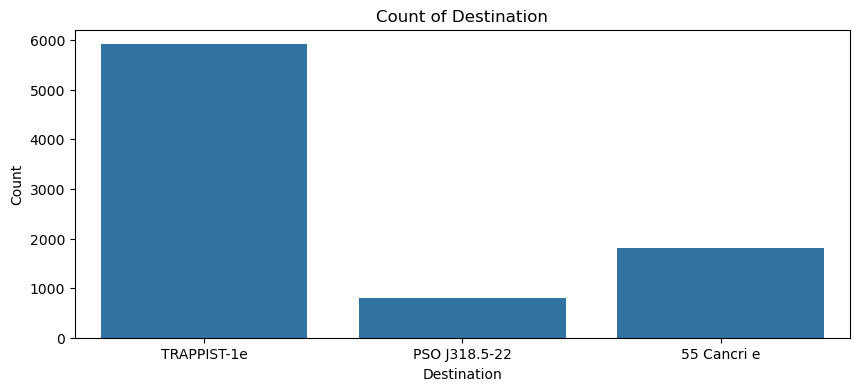

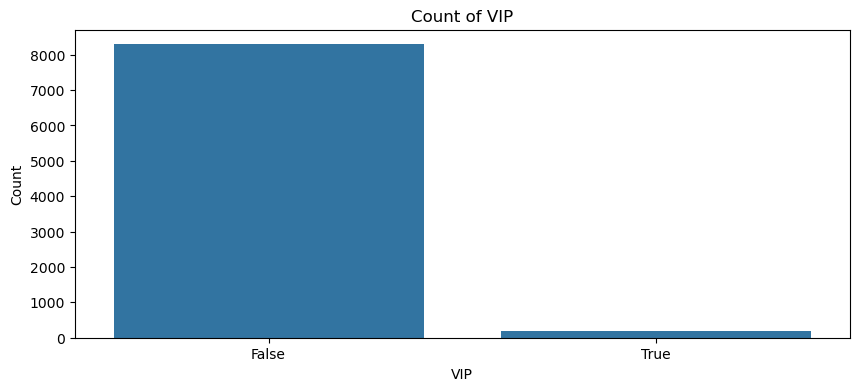

In [4]:
# List of categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot count plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


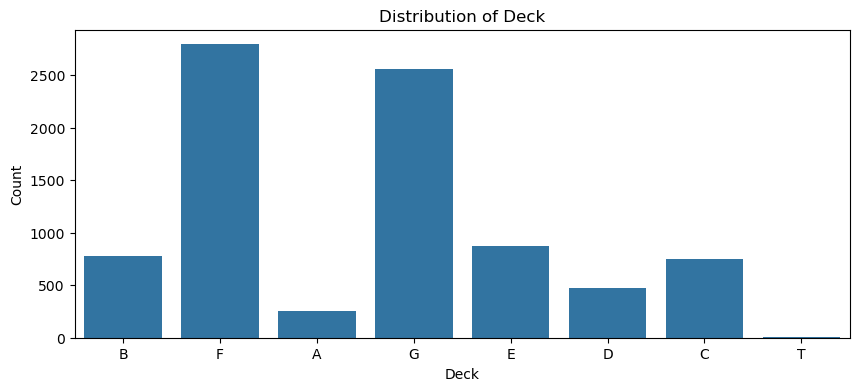

Data with decomposed Cabin feature:
   Cabin Deck CabinNum Side
0  B/0/P    B        0    P
1  F/0/S    F        0    S
2  A/0/S    A        0    S
3  A/0/S    A        0    S
4  F/1/S    F        1    S


In [5]:
# Split the Cabin column into Deck, CabinNum, and Side
cabin_split = df['Cabin'].str.split('/', expand=True)
df['Deck'] = cabin_split[0]
df['CabinNum'] = cabin_split[1]
df['Side'] = cabin_split[2]

# Check the distribution of the Deck feature
plt.figure(figsize=(10, 4))
sns.countplot(x='Deck', data=df)
plt.title("Distribution of Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
plt.show()

# Optionally, view the first few rows with the new columns
print("Data with decomposed Cabin feature:")
print(df[['Cabin', 'Deck', 'CabinNum', 'Side']].head())


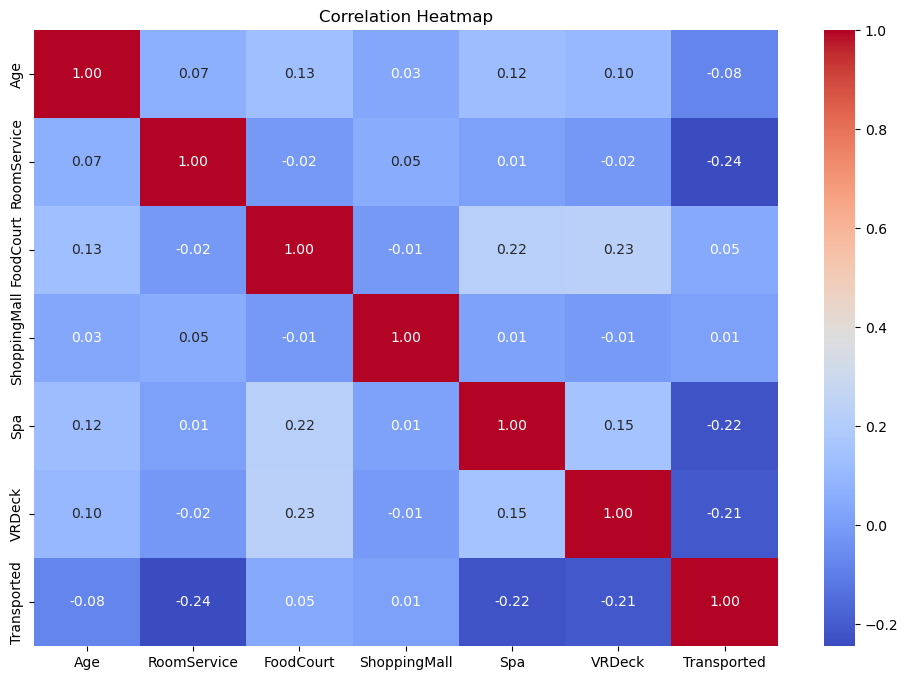

In [6]:
# Compute correlations between numerical features and the target
plt.figure(figsize=(12, 8))
corr = df[numerical_features + ['Transported']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Example: Simple approach to imputation

# 1. Categorical columns: fill with mode
for col in ['HomePlanet', 'Destination', 'Deck', 'Side']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Boolean columns (CryoSleep, VIP): fill with False
#    (Alternatively, you could create a new category 'Unknown')
for col in ['CryoSleep', 'VIP']:
    df[col] = df[col].fillna(False)

# 3. Numerical columns: fill with median (for Age) or 0 (for spending)
df['Age'] = df['Age'].fillna(df['Age'].median())
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[col] = df[col].fillna(0)

# 4. If CabinNum is missing, fill with -1 (or another placeholder)
df['CabinNum'] = df['CabinNum'].fillna(-1)


/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_97945/3771856130.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)


In [8]:
df['TotalSpend'] = (df['RoomService'] + df['FoodCourt'] +
                    df['ShoppingMall'] + df['Spa'] +
                    df['VRDeck'])
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[f'{col}_Spent'] = (df[col] > 0).astype(int)


In [9]:
# Extract group ID
df['GroupID'] = df['PassengerId'].str.split('_').str[0]

# Compute group features
group_stats = df.groupby('GroupID').agg({
    'Age': ['mean', 'median'],
    'TotalSpend': 'mean',
    'Transported': 'mean'  # If you want to see group-level transport rate
}).reset_index()

# Rename columns
group_stats.columns = ['GroupID', 'GroupAgeMean', 'GroupAgeMedian', 'GroupSpendMean', 'GroupTransportRate']

# Merge back into the main DataFrame
df = pd.merge(df, group_stats, on='GroupID', how='left')


In [10]:
# Example: Simple bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=False, include_lowest=True)


In [12]:
# First, ensure you have a 'GroupID' column extracted from 'PassengerId'
df['GroupID'] = df['PassengerId'].str.split('_').str[0]

# Now, compute the group size for each passenger by counting occurrences of each GroupID
df['GroupSize'] = df.groupby('GroupID')['GroupID'].transform('count')

# (Optional) Check if the new column has been added
print(df[['PassengerId', 'GroupID', 'GroupSize']].head())


  PassengerId GroupID  GroupSize
0     0001_01    0001          1
1     0002_01    0002          1
2     0003_01    0003          2
3     0003_02    0003          2
4     0004_01    0004          1


## Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
features = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'Deck', 'Side',
            'TotalSpend', 'GroupSize', 'GroupAgeMean', 'GroupSpendMean']  # Example
X = df[features]
y = df['Transported']

# One-hot encode categorical features (if needed)
X = pd.get_dummies(X, columns=['HomePlanet', 'Deck', 'Side'], drop_first=True)

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape)


(6954, 17) (1739, 17)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define features based on our previous feature engineering
features = ['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'Deck', 'Side',
            'TotalSpend', 'GroupSize', 'GroupAgeMean', 'GroupSpendMean']
X = df[features]
y = df['Transported']

# One-hot encode categorical variables (HomePlanet, Deck, Side)
X = pd.get_dummies(X, columns=['HomePlanet', 'Deck', 'Side'], drop_first=True)

# Split the dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

print("Validation Accuracy:", accuracy)
print("Validation ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.7291546866014951
Validation ROC AUC: 0.7923118744692166

Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.81      0.75       861
        True       0.78      0.65      0.71       878

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize the model with the best parameters
best_rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions on the validation set
y_pred_best = best_rf.predict(X_val)
y_proba_best = best_rf.predict_proba(X_val)[:, 1]

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_pred_best)
val_roc_auc = roc_auc_score(y_val, y_proba_best)

print("Optimized RF Validation Accuracy:", val_accuracy)
print("Optimized RF Validation ROC AUC:", val_roc_auc)
print("\nClassification Report:\n", classification_report(y_val, y_pred_best))


Optimized RF Validation Accuracy: 0.7446808510638298
Optimized RF Validation ROC AUC: 0.8121833488103837

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.83      0.76       861
        True       0.80      0.66      0.72       878

    accuracy                           0.74      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.74      0.74      1739



In [16]:
from sklearn.model_selection import GridSearchCV

# Example parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV ROC AUC: 0.8026028299371092


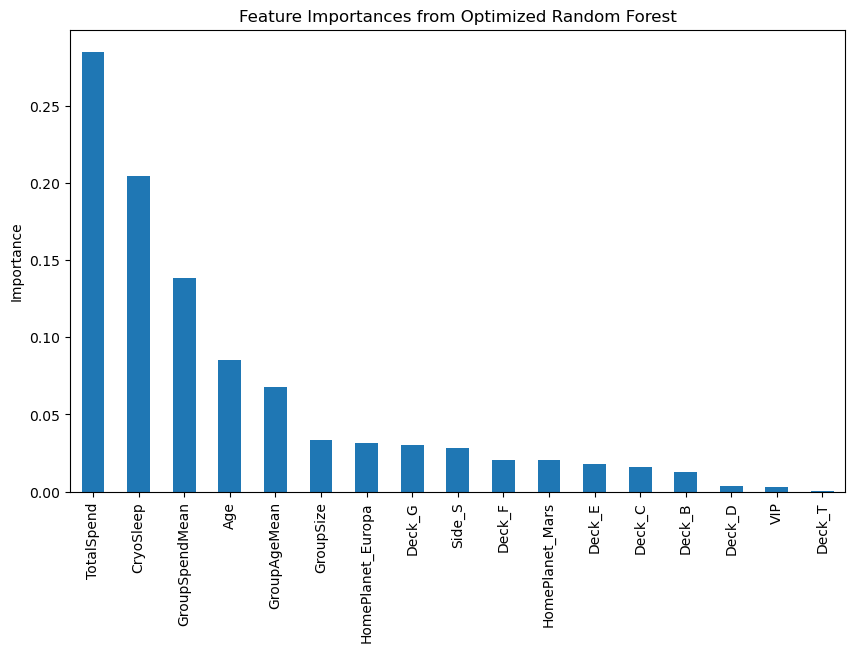

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances from Optimized Random Forest")
plt.ylabel("Importance")
plt.show()


## XGBoost

In [22]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.9 MB/s eta 0:00:0000:010:01


In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [24]:
# Suppose df is your cleaned/engineered dataset
# and "Transported" is your target

features = [
    'HomePlanet', 'CryoSleep', 'Age', 'VIP', 'Deck', 'Side',
    'TotalSpend', 'GroupSize', 'GroupAgeMean', 'GroupSpendMean'
]

X = df[features]
y = df['Transported']

# One-hot encode categorical variables (if not already done)
X = pd.get_dummies(X, columns=['HomePlanet', 'Deck', 'Side'], drop_first=True)

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Initialize the XGBoost classifier
xgb_baseline = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',  # needed to avoid warning in recent XGBoost versions
    random_state=42,
    learning_rate=0.01,
    colsample_bytree=0.8,
    subsample=0.8,
    max_depth=7,
    n_estimators=200,
    min_child_weight=1,
    gamma=0,
    
    
)

# Fit to the training data
xgb_baseline.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = xgb_baseline.predict(X_val)
y_proba_xgb = xgb_baseline.predict_proba(X_val)[:, 1]

# Evaluate
acc_xgb = accuracy_score(y_val, y_pred_xgb)
roc_xgb = roc_auc_score(y_val, y_proba_xgb)

print("Baseline XGBoost Validation Accuracy:", acc_xgb)
print("Baseline XGBoost Validation ROC AUC:", roc_xgb)
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))


Baseline XGBoost Validation Accuracy: 0.745830937320299
Baseline XGBoost Validation ROC AUC: 0.8109524603218697

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.84      0.77       861
        True       0.80      0.66      0.72       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.75      0.74      1739



/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:43:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
# Define a parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # or 'accuracy', depending on your metric preference
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # use all available cores
    verbose=1
)

# Perform the grid search on the training data
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search_xgb.best_params_)
print("Best CV ROC AUC:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV ROC AUC: 0.8033474965019041


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
# Suppose rf_proba is from your Random Forest model
ensemble_proba = 0.5 * y_proba_best + 0.5 * y_proba_xgb  # equal weighting
ensemble_pred = (ensemble_proba > 0.5).astype(int)

acc_ensemble = accuracy_score(y_val, ensemble_pred)
roc_ensemble = roc_auc_score(y_val, ensemble_proba)

print("Ensemble Validation Accuracy:", acc_ensemble)
print("Ensemble Validation ROC AUC:", roc_ensemble)


Ensemble Validation Accuracy: 0.7452558941920644
Ensemble Validation ROC AUC: 0.8126516287941923


## Testing 

In [36]:
import pandas as pd
import numpy as np

# Read the test set
test_df = pd.read_csv("test.csv")


test_df['HomePlanet'].fillna("Earth", inplace=True)  # Example, replace with your actual mode

# Fill CryoSleep and VIP with False
test_df['CryoSleep'].fillna(False, inplace=True)
test_df['VIP'].fillna(False, inplace=True)

# Fill Age with the median from training
test_df['Age'].fillna(27, inplace=True)  # Example, replace with your actual median

# Fill spending columns with 0
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_df[col].fillna(0, inplace=True)

# 2. Decompose Cabin (Deck, CabinNum, Side)
# -----------------------------------------
cabin_split = test_df['Cabin'].str.split('/', expand=True)
test_df['Deck'] = cabin_split[0]
test_df['CabinNum'] = cabin_split[1]
test_df['Side'] = cabin_split[2]

# If CabinNum is missing or not numeric, handle that (e.g., fill with -1)
test_df['CabinNum'] = pd.to_numeric(test_df['CabinNum'], errors='coerce').fillna(-1)

# 3. Create GroupID and Group-Level Features
# ------------------------------------------
# GroupID from PassengerId (gggg_pp => gggg)
test_df['GroupID'] = test_df['PassengerId'].str.split('_').str[0]

# If you simply want the group size in test data:
test_df['GroupSize'] = test_df.groupby('GroupID')['GroupID'].transform('count')

# NOTE: If in your training code, you computed group stats (e.g., GroupSpendMean)
# from the train set, you'll need to merge them onto the test set.
# For example, if you have a DataFrame "group_stats" with columns ["GroupID", "GroupSpendMean"]
# from the TRAIN data, you can do:
# test_df = pd.merge(test_df, group_stats[['GroupID','GroupSpendMean']], on='GroupID', how='left')
# # fill new groups (only in test) with global means or zeros
# test_df['GroupSpendMean'].fillna(global_spend_mean, inplace=True)

# 4. Create TotalSpend
# --------------------
test_df['TotalSpend'] = (test_df['RoomService'] + test_df['FoodCourt'] +
                         test_df['ShoppingMall'] + test_df['Spa'] +
                         test_df['VRDeck'])

# 5. One-Hot Encode (Align with Training)
# ---------------------------------------
# Make sure you use the SAME columns and the SAME approach as with your training data.
# For instance, if you did:
#    X_train = pd.get_dummies(X_train, columns=['HomePlanet', 'Deck', 'Side'], drop_first=True)
# then do exactly that here. We'll store the original columns, then align after encoding.

categorical_cols = ['HomePlanet', 'Deck', 'Side']
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# 6. Finalize Feature Set
# -----------------------
# Suppose these are the columns your model expects (same as X_train.columns).
# You must ensure that test_df has the same columns in the same order.
expected_features = [
    'HomePlanet', 'CryoSleep', 'Age', 'VIP', 'Deck', 'Side',
    'TotalSpend', 'GroupSize', 'GroupAgeMean', 'GroupSpendMean'

]
# If you have more or fewer columns, adjust accordingly.

# Some columns might be missing in test if they never appear (e.g., no Deck_T in test).
# We can add them as zeros:
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = 0

# If test_df has extra columns not in expected_features, drop them:
for col in list(test_df.columns):
    if col not in expected_features and col != 'PassengerId':
        test_df.drop(col, axis=1, inplace=True)

# Reorder columns to match training
test_df = test_df[expected_features]
# Assume test_df is your processed test DataFrame (after missing value imputation, feature engineering, etc.)

# Step 1: Apply one-hot encoding to the categorical features
# (This should be exactly the same as what you did for training data)
test_df_encoded = pd.get_dummies(test_df, columns=['HomePlanet', 'Deck', 'Side'], drop_first=True)

# Step 2: Align the test set columns with the training set columns
# Let's assume your training features after encoding are stored in 'X_train'
expected_columns = X_train.columns  # from your training pipeline

# Reindex test_df_encoded to include all expected columns, filling missing ones with 0
test_df_aligned = test_df_encoded.reindex(columns=expected_columns, fill_value=0)

# Now test_df_aligned has exactly the same columns as X_train
print("Test data columns:", test_df_aligned.columns.tolist())

# test_df is now ready for prediction


Test data columns: ['CryoSleep', 'Age', 'VIP', 'TotalSpend', 'GroupSize', 'GroupAgeMean', 'GroupSpendMean', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S']


/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_97945/4195929094.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['HomePlanet'].fillna("Earth", inplace=True)  # Example, replace with your actual mode
/var/folders/2v/418w7x5d03g34d38xmfssx8h0000gn/T/ipykernel_97945/4195929094.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

In [39]:
# Assume 'final_model' is your trained model (e.g., RandomForest, XGBoost)
# from the training pipeline.
# Example: final training on the entire dataset (X, y)
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',  # needed to avoid warning in recent XGBoost versions
    random_state=42,
    learning_rate=0.01,
    colsample_bytree=0.8,
    subsample=0.8,
    max_depth=7,
    n_estimators=200,
    min_child_weight=1,
    gamma=0,
)
final_model.fit(X, y)

# Predict on test set
test_pred = final_model.predict(test_df_aligned)

# Convert predictions (0/1) to booleans (False/True)
test_pred_bool = test_pred.astype(bool)

# Load the original test.csv again (or keep a copy) to attach predictions
submission_df = pd.read_csv("test.csv")
submission_df["Transported"] = test_pred_bool

# Save the submission file with boolean predictions
submission_df[["PassengerId", "Transported"]].to_csv("submission.csv", index=False)
print("Submission file created successfully with boolean values!")


Submission file created successfully with boolean values!


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:48:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
